In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt

In [16]:
#Read in dataset
df = pd.read_csv('datasets/avocado.csv')
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [17]:
#Check for missing values
df.dropna

<bound method DataFrame.dropna of        Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0               0  2015-12-27          1.33      64236.62  1036.74   54454.85   
1               1  2015-12-20          1.35      54876.98   674.28   44638.81   
2               2  2015-12-13          0.93     118220.22   794.70  109149.67   
3               3  2015-12-06          1.08      78992.15  1132.00   71976.41   
4               4  2015-11-29          1.28      51039.60   941.48   43838.39   
...           ...         ...           ...           ...      ...        ...   
18244           7  2018-02-04          1.63      17074.83  2046.96    1529.20   
18245           8  2018-01-28          1.71      13888.04  1191.70    3431.50   
18246           9  2018-01-21          1.87      13766.76  1191.92    2452.79   
18247          10  2018-01-14          1.93      16205.22  1527.63    2981.04   
18248          11  2018-01-07          1.62      17489.58  2894.77    2356.

In [18]:
df['region'].value_counts()

GrandRapids            338
Nashville              338
RaleighGreensboro      338
Denver                 338
Philadelphia           338
Roanoke                338
Houston                338
MiamiFtLauderdale      338
Portland               338
Boise                  338
SanFrancisco           338
LosAngeles             338
RichmondNorfolk        338
NewYork                338
Seattle                338
Orlando                338
Southeast              338
BaltimoreWashington    338
Pittsburgh             338
Jacksonville           338
West                   338
DallasFtWorth          338
CincinnatiDayton       338
Midsouth               338
SouthCentral           338
TotalUS                338
HarrisburgScranton     338
SanDiego               338
Columbus               338
California             338
Northeast              338
GreatLakes             338
PhoenixTucson          338
Atlanta                338
Sacramento             338
Indianapolis           338
BuffaloRochester       338
H

In [4]:
#Drop unnecessary columns
df.drop(["Unnamed: 0","Date","region"],axis=1,inplace=True)
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015


In [5]:
#Convert type column from string to integer
df["type"]=LabelEncoder().fit_transform(df["type"])
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015


In [6]:
#Define target and features
features = len(df.columns)
y = df.iloc[:,0].values
X = df.iloc[:,1:features].values

In [7]:
#Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [8]:
#Split data into training, test, and validation sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)
X_validate, X_test, y_validate, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=0)

In [9]:
#Define a K-nearest neighbors Regression model
model = KNeighborsRegressor(n_neighbors=8).fit(X_train,y_train)
model.score(X_test,y_test)

0.737590000916527

In [10]:
#Loop through to find optimal number of neighbors
neighbors = range(1,15)
scores = []
results = 0
best_score = 0

for n in neighbors:
    knn = KNeighborsRegressor(n_neighbors=n).fit(X_train,y_train)
    results = knn.score(X_test,y_test)
    scores.append(round(results,2))
    
    if results > best_score:
        best_score = results
        best_k = n
        best_model = knn

print(scores)
print(best_k)

[0.64, 0.72, 0.74, 0.75, 0.75, 0.74, 0.74, 0.74, 0.73, 0.73, 0.73, 0.73, 0.72, 0.72]
5


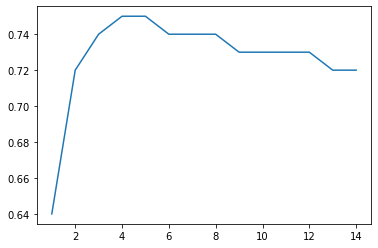

In [11]:
#Plot curve
plt.plot(neighbors,scores)

In [12]:
#Calculate accuracy of best performing model (n_neighbors = 5)
accuracy = best_model.score(X_validate,y_validate)
print("The best model has an accuracy of:",round(accuracy,2))

The best model has an accuracy of: 0.75


In [13]:
#Define Linear Regression model and check if performance is better than KNR
model_linear = LinearRegression().fit(X_train,y_train)
score = model_linear.score(X_test,y_test)
print(score)

0.40114845184837444


In [14]:
#Define Random Forest Regressor and use MSE as criterion for splitting
model_forest = RandomForestRegressor(criterion='mse',max_leaf_nodes=100).fit(X_train,y_train.ravel())
score = model_forest.score(X_test,y_test)
y_pred = model_forest.predict(X_test)
print(score)

0.6867179090546753


In [15]:
#Check if Random Forest Regressor has better performance than KNR
print("Accuracy:",score)
print("MSE:" + str(mean_squared_error(y_test,y_pred)))

Accuracy: 0.6867179090546753
MSE:0.05114234974527145
